---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [44]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


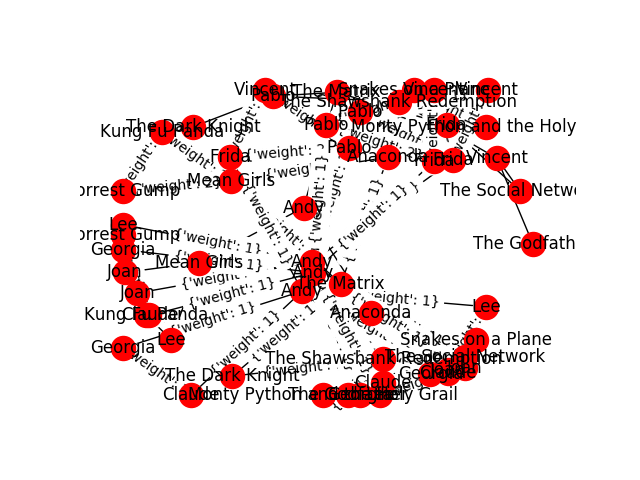

In [2]:
def answer_one():
        
    Graph = nx.read_adjlist("Employee_Movie_Choices.txt" , delimiter = "\t" )
    return Graph
#plot_graph(answer_one())
#answer_one()

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [45]:
def answer_two():

    Graph = answer_one()
    for movie in Graph.nodes():
        if movie in movies:
            Graph.add_node(movie, type = "movie")
        else:
            notMovie = movie
            Graph.add_node(notMovie , type = "employee")
    return Graph
#nx.get_node_attributes(answer_two() ,name = "type")
#answer_two()

{'Anaconda': 'movie',
 'Andy': 'employee',
 'Claude': 'employee',
 'Forrest Gump': 'movie',
 'Frida': 'employee',
 'Georgia': 'employee',
 'Joan': 'employee',
 'Kung Fu Panda': 'movie',
 'Lee': 'employee',
 'Mean Girls': 'movie',
 'Monty Python and the Holy Grail': 'movie',
 'Pablo': 'employee',
 'Snakes on a Plane': 'movie',
 'The Dark Knight': 'movie',
 'The Godfather': 'movie',
 'The Matrix': 'movie',
 'The Shawshank Redemption': 'movie',
 'The Social Network': 'movie',
 'Vincent': 'employee'}

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


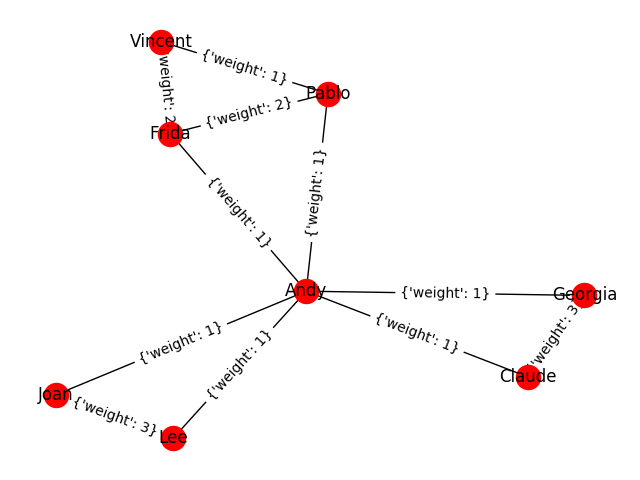

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


{('Andy', 'Lee'): <matplotlib.text.Text at 0x7ff6c6498780>,
 ('Claude', 'Andy'): <matplotlib.text.Text at 0x7ff6c647e710>,
 ('Frida', 'Andy'): <matplotlib.text.Text at 0x7ff6c64855c0>,
 ('Frida', 'Vincent'): <matplotlib.text.Text at 0x7ff6c648b9b0>,
 ('Georgia', 'Andy'): <matplotlib.text.Text at 0x7ff6c618b940>,
 ('Georgia', 'Claude'): <matplotlib.text.Text at 0x7ff6c6429cf8>,
 ('Joan', 'Andy'): <matplotlib.text.Text at 0x7ff6c646d748>,
 ('Joan', 'Lee'): <matplotlib.text.Text at 0x7ff6c6471ac8>,
 ('Pablo', 'Andy'): <matplotlib.text.Text at 0x7ff6c642e240>,
 ('Pablo', 'Frida'): <matplotlib.text.Text at 0x7ff6c642eb38>,
 ('Pablo', 'Vincent'): <matplotlib.text.Text at 0x7ff6c886e278>}

In [48]:
def answer_three():
        
    Graph = answer_two()
    P = bipartite.weighted_projected_graph(Graph , employees)
    
    return P
#Projected = answer_three()
#pos = nx.spring_layout(Projected)
#nx.draw(Projected , pos = pos , with_labels = True)
#nx.draw_networkx_edge_labels(Projected , pos)

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [87]:
def answer_four():
        
    empdf = pd.read_csv("Employee_Relationships.txt" , 
                    names = ["emp1","emp1pair","relationshipscore"] ,delimiter = "\t")
    
    Mov = answer_three()
    ProjectedGraph = pd.DataFrame(Mov.edges(data = True) , columns=["emp1" , "emp1pair" , "NumMovies"])
    ProjectedGraph["NumMovies"] = ProjectedGraph["NumMovies"].apply(lambda x : list(x.values())[0])
    
    ProjectedGraphCp = ProjectedGraph.copy()
    ProjectedGraphCp.rename(columns = {"emp1" : "emp1pair",
                                       "emp1pair" : "emp1"} ,inplace = True)
    ProjectedFinal = pd.concat([ProjectedGraph , ProjectedGraphCp])
    
    
    MergedData = pd.merge(empdf , ProjectedFinal , how = "left" , on =["emp1","emp1pair"])
    MergedData["relationshipscore"] = MergedData["relationshipscore"].apply(lambda x : float(x))
    MergedData["NumMovies"].fillna(value = 0 , inplace = True)
    
    return MergedData["relationshipscore"].corr(MergedData["NumMovies"])
answer_four()

0.78839622217334748